In [21]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
* 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [7]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# train : test = 8 : 2 분리

In [9]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [10]:
train = df[:split_count]
test = df[split_count:]
train.shape, test.shape

((614, 9), (154, 9))

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 사용할 컬럼

In [12]:
# Outcome은 결과 값이므로 제외
feature_names = df.columns.tolist()
feature_names.remove("Outcome")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [13]:
# Outcome label로 지정
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터 셋

### train data set

In [14]:
# train data의 feature, label 분리
X_train = train[feature_names]
X_train.shape

(614, 8)

In [15]:
y_train = train[label_name]
y_train.shape

(614,)

### test data set

In [16]:
# test data의 feature, label 분리
X_test = test[feature_names]
X_test.shape

(154, 8)

In [17]:
y_test = test[label_name]
y_test.shape

(154,)

# Decision Tree Algorithm

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DecisionTreeClassifier??

In [95]:
# max_features : feature를 얼마나 사용할지
# int : feature 개수
# float : feature 비율 
model = DecisionTreeClassifier(random_state=42, max_features=0.9, max_depth=5)
model

DecisionTreeClassifier(max_depth=5, max_features=0.9, random_state=42)

## 모델 학습

In [96]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.9, random_state=42)

## 예측

In [97]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

# Tree Algorithm 분석, 시각화

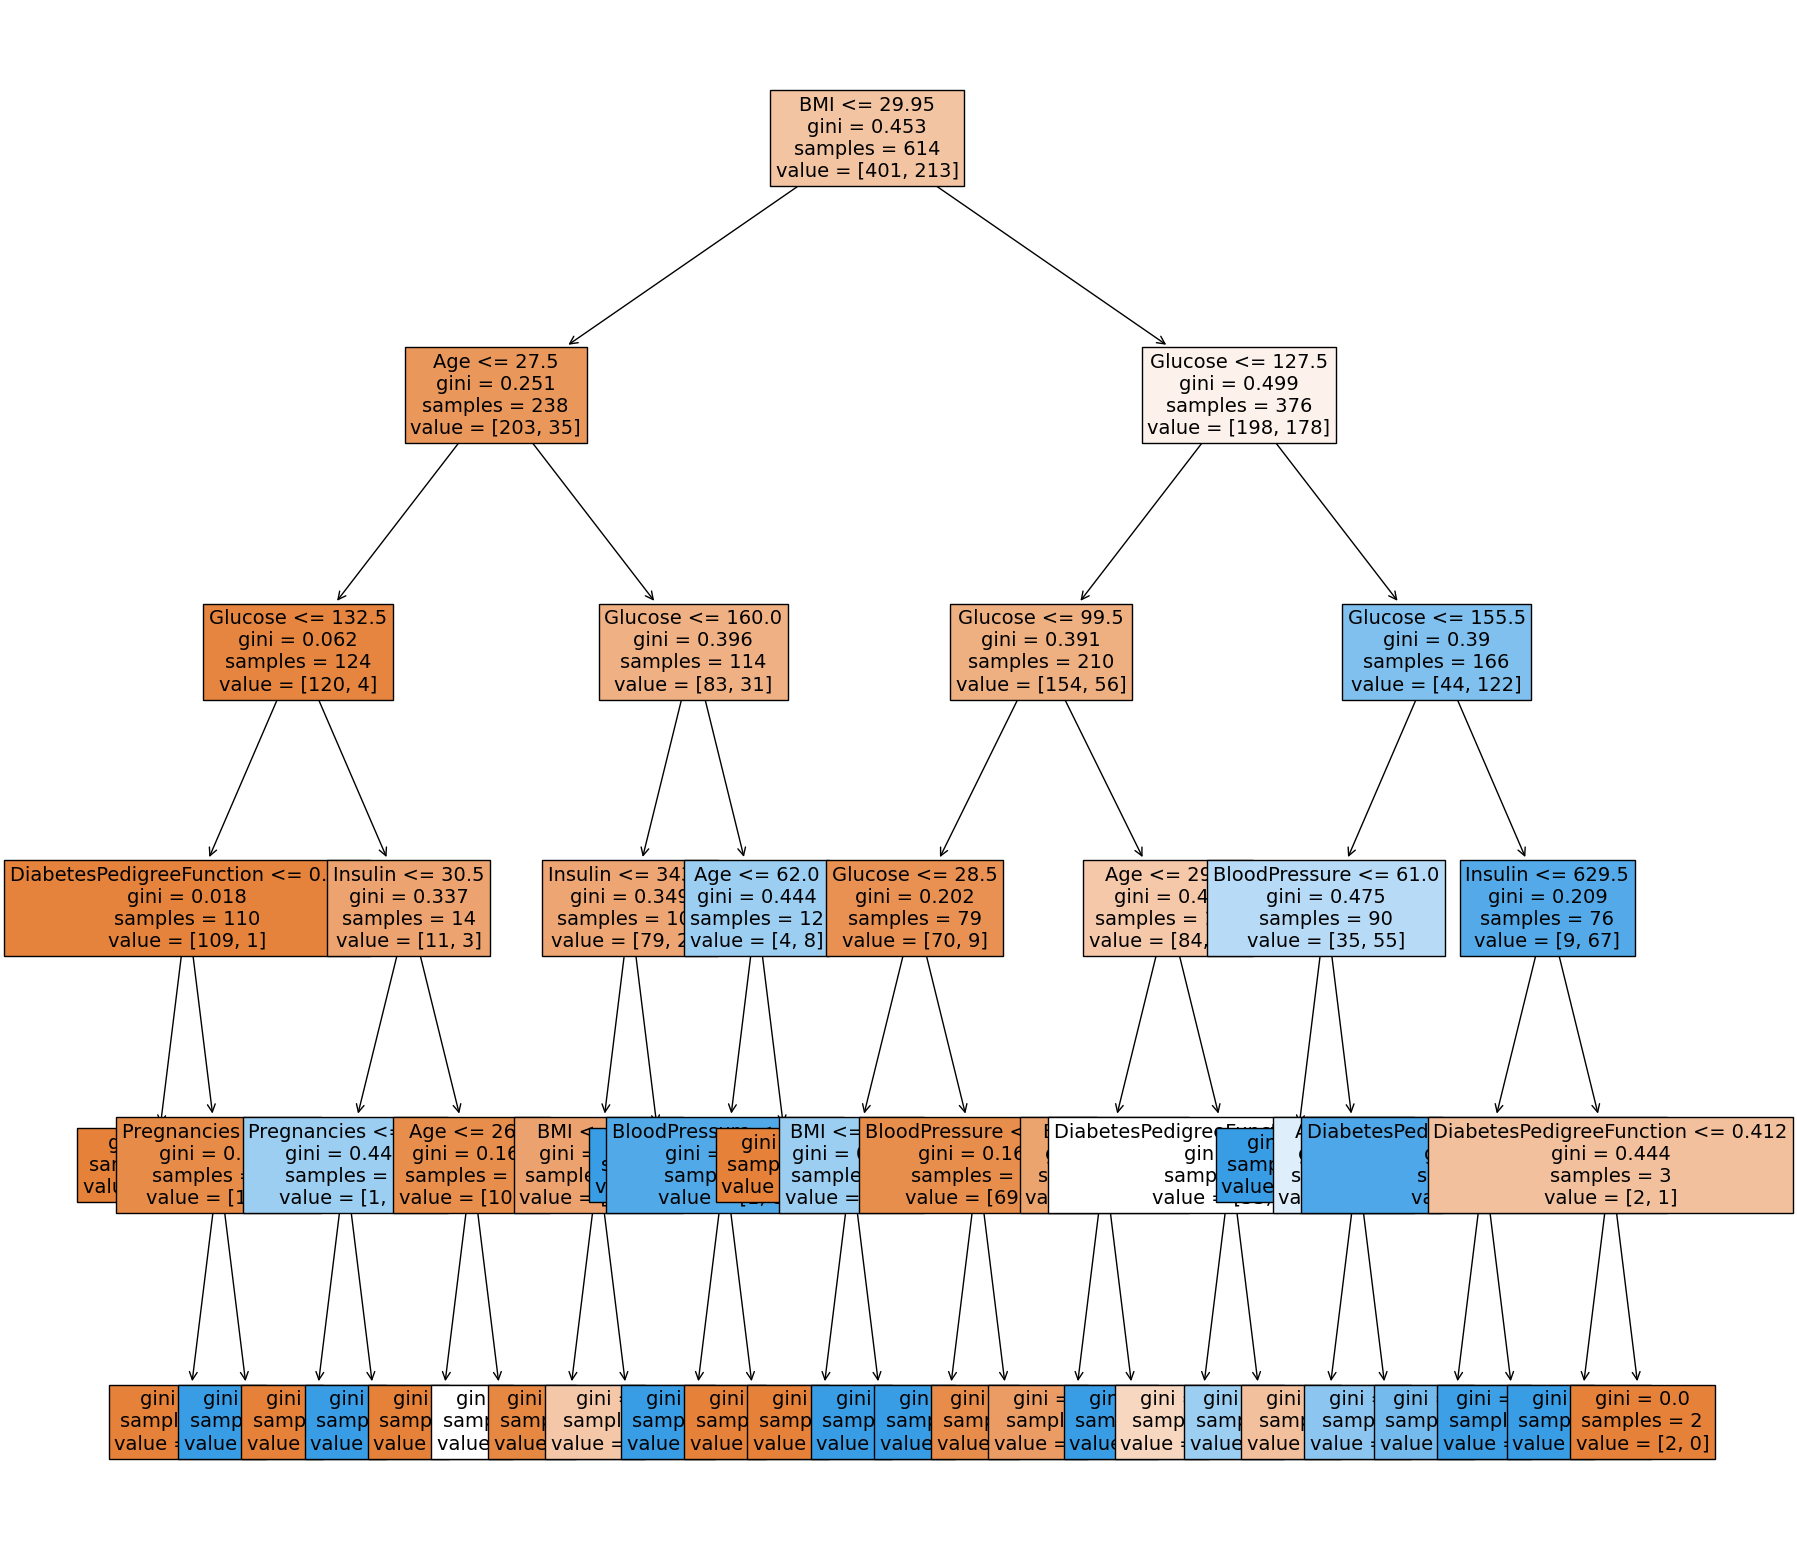

In [98]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
# 다 그리면 오래 걸려서 maxd_epth 설정
plot_tree(model, max_depth=5, feature_names=feature_names, filled=True, fontsize=14)
plt.show()

## 지니 불순도 직접 계산

In [99]:
1 - (401/614) ** 2 - (213/614) ** 2

0.45312417107873837

# 모델 평가

## feature importance

In [100]:
# feature importance 추출
model.feature_importances_

array([0.02203421, 0.41250043, 0.05555565, 0.        , 0.04066241,
       0.28469555, 0.03468706, 0.14986469])

<AxesSubplot:>

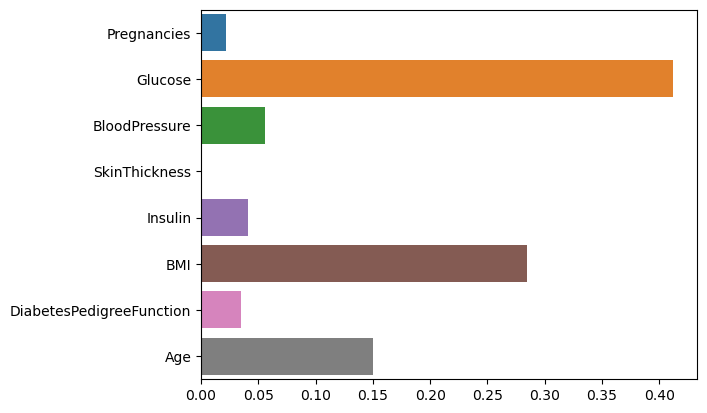

In [101]:
# feature importance 시각화
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

## 정확도, Accuracy

In [102]:
# 직접 구현
(y_test == y_predict).mean()

0.7402597402597403

In [103]:
# 알고리즘 사용
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7402597402597403

In [104]:
model.score(X_test, y_test)

0.7402597402597403